{0.01: 1.0, 0.011: 1.0, 0.011999999999999999: 1.0, 0.012999999999999998: 1.0, 0.013999999999999997: 1.0, 0.014999999999999996: 1.0, 0.015999999999999993: 1.0, 0.016999999999999994: 1.0, 0.017999999999999995: 1.0, 0.018999999999999993: 1.0, 0.01999999999999999: 1.0, 0.02099999999999999: 1.0, 0.021999999999999992: 1.0, 0.02299999999999999: 1.0, 0.023999999999999987: 1.0, 0.024999999999999988: 1.0, 0.02599999999999999: 1.0, 0.02699999999999999: 1.0, 0.027999999999999983: 1.0, 0.028999999999999984: 1.0, 0.029999999999999985: 1.0, 0.030999999999999986: 1.0, 0.03199999999999998: 1.0, 0.03299999999999998: 1.0, 0.03399999999999998: 1.0, 0.03499999999999998: 1.0, 0.035999999999999976: 1.0, 0.03699999999999998: 1.0, 0.03799999999999998: 1.0, 0.03899999999999998: 1.0, 0.03999999999999997: 1.0, 0.040999999999999974: 1.0, 0.041999999999999975: 1.0, 0.042999999999999976: 1.0, 0.04399999999999998: 1.0, 0.04499999999999997: 1.0, 0.04599999999999997: 1.0, 0.04699999999999997: 1.0, 0.047999999999999966:

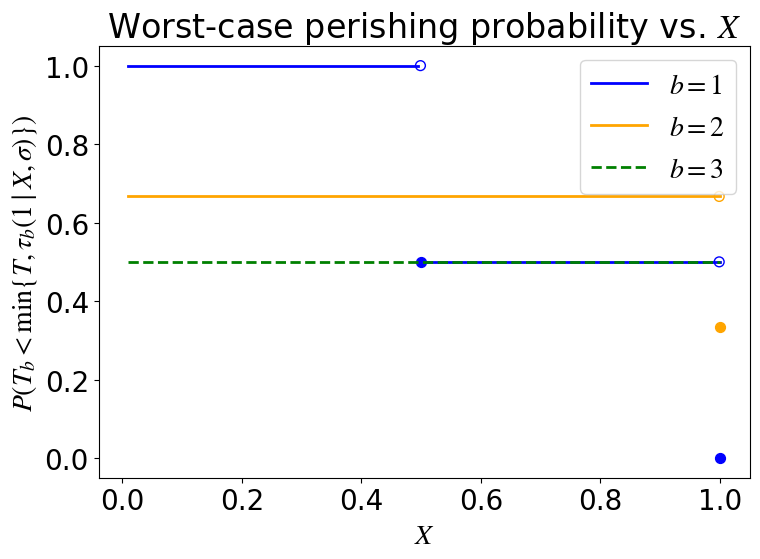

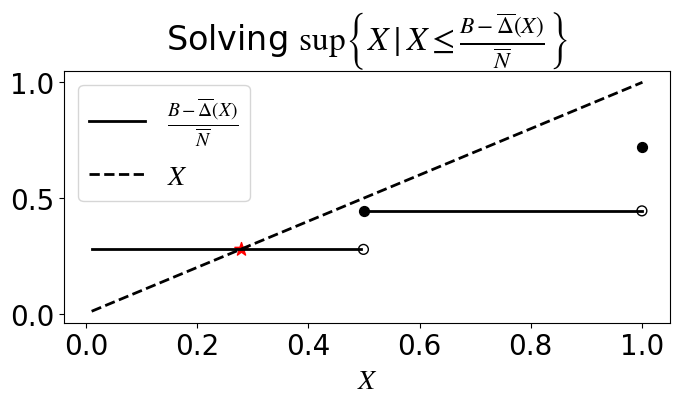

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math


plt.style.use('PaperDoubleFig.mplstyle.txt')
plt.rc('text.latex', preamble=r'\usepackage{amsfonts}')

# Define the functions
def func1(x):
    return (min(3, math.ceil(1/x))-1)/2

def func2(x):
    return (min(3, math.ceil(2/x))-1)/3

def func3(x):
    return 1/2

# Generate x values
x_values = np.arange(0.01, 1.002, 0.001)  # Avoid division by zero, start from a small value

# Calculate y values for each function
y_values1 = {x: func1(x) for x in x_values}
y_values2 = {x: func2(x) for x in x_values}
y_values3 = {x: func3(x) for x in x_values}
for x in x_values:
  if x >= 0.495 and x <= 0.505:
    y_values1[x] = np.nan
  if x >= 1:
    y_values1[x] = np.nan
    y_values2[x] = np.nan


print(y_values1)
# raise ValueError()


sum_val = {}
rhs = {}
for x in x_values:
  if np.isnan(y_values1[x]):
    sum_val[x] = np.nan
    rhs[x] = np.nan
  else:
    sum_val[x] = y_values1[x] + y_values2[x] + y_values3[x]
    rhs[x] = 1-sum_val[x]/3






# Plot the functions
plt.figure(figsize=(8, 6))

plt.plot(x_values, [y_values1[x] for x in x_values], label=r'$b=1$',color='blue')
plt.scatter(1, 0, marker='o', s=50,color='blue')
plt.scatter(0.999, 0.5, marker='o', facecolors='none',s=50,color='blue')
plt.scatter(1, 1.0/3, marker='o', s=50,color='orange')
plt.scatter(0.999, 2.0/3, marker='o', facecolors='none',s=50,color='orange')
plt.scatter(0.499, func1(0.499), color='blue', marker='o', facecolors='none', s=50)
plt.scatter(0.5, func1(0.5), color='blue', marker='o', s=50)
plt.plot(x_values, [y_values2[x] for x in x_values], label=r'$b=2$',color='orange')
plt.plot(x_values, [y_values3[x] for x in x_values], label=r'$b=3$',color='green',ls='--')

plt.title(r'Worst-case perishing probability vs. $X$')
plt.xlabel(r'$X$')
plt.ylabel(r'$P(T_b < \min\{T, \tau_b(1 \mid X,\sigma)\})$')
plt.legend()
plt.show()

plt.plot(x_values, list(rhs.values()),color='black',label=r'$\frac{B-\overline{\Delta}(X)}{\overline{N}}$')
plt.plot(x_values,x_values,color='black',ls='--',label=r'$X$')
sum_val[0.499] = func1(0.499) + func2(0.499) + func3(0.499)
rhs[0.499] = 1-sum_val[0.499]/3
sum_val[0.5] = func1(0.5) + func2(0.5) + func3(0.5)
rhs[0.5] = 1-sum_val[0.5]/3
plt.scatter(0.499, rhs[0.499], color='black', marker='o', facecolors='none', s=50)
plt.scatter(0.5, rhs[0.5], color='black', marker='o', s=50)
plt.scatter(0.2779999999999998, rhs[0.2779999999999998],marker='*', s=100,color='red')
plt.scatter(1,0.7222222222222223,marker='o',s=50,color='black')
plt.scatter(1,0.44444444444444453,marker='o',s=50,facecolors='none',color='black')
# plt.scatter(0, 0,marker='o', s=50,color='black')
# plt.scatter(0,0.2777777777777778,marker='o',facecolors='none',s=50,color='black')
plt.xlabel(r'$X$')
plt.title(r'Solving $\sup\left\{X \mid X \leq \frac{B-\overline{\Delta}(X)}{\overline{N}}\right\}$')
plt.legend()
plt.show()

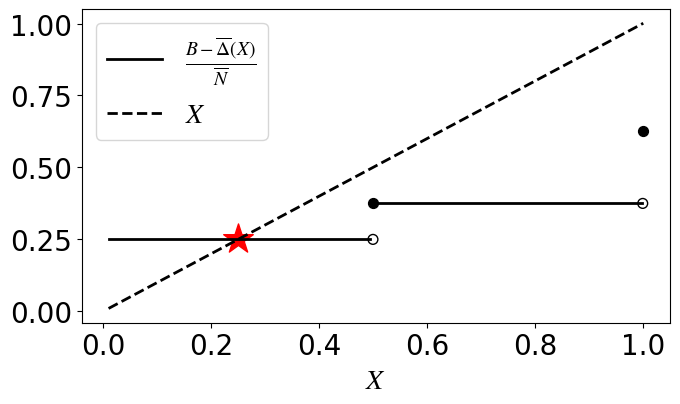

In [14]:
def cdf(id,half_value_thresholds,x):
    min_value = min(4, math.ceil(id/x))
    # print(id,x,math.ceil(id/x),min_value)
    if min_value < min(half_value_thresholds):
      return 0
    elif min_value in half_value_thresholds:
      return 1/2
    else:
      return 1

thresh = {1: [2], 2: [2,3,4], 3: [3], 4: [4]}
plt_dct = {}
yval = np.arange(0.01,1.002,0.001)
xval = [round(e,3) for e in yval]
ids = [1,2,3,4]
# discontinuities = [0.5]
# ids = [1,]
for id in ids:
  plt_dct[id] = {}
  for x in xval:
    plt_dct[id][x] = cdf(id,thresh[id],x)

agg_dct = {}
rhs = {}
discontinuities = {}
for x in xval:
  agg_dct[x] = sum(plt_dct[id][x] for id in ids)
  rhs[x] = 1-agg_dct[x]/len(ids)
  if x == 0.499 or x == 0.999:
    discontinuities[x] = rhs[x]
  if x >= 0.495 and x <= 0.505 and x != 0.5:
    rhs[x] = np.nan
  if x == 0.999:
    rhs[x] = np.nan


plt.plot(xval,list(rhs.values()),color='black',label=r'$\frac{B-\overline{\Delta}(X)}{\overline{N}}$')
plt.plot(xval, xval,color='black',ls='--',label=r'$X$')
plt.scatter(0.5,rhs[0.5],color='black',marker = 'o',s=50)
plt.scatter(0.5,discontinuities[0.499],color='black',marker = 'o',facecolors='none',s=50)
plt.scatter(0.25,0.25,color='red',marker='*',s=500)
plt.scatter(1,rhs[1],color='black',marker = 'o',s=50)
plt.scatter(1,discontinuities[0.999],color='black',marker = 'o',facecolors='none',s=50)
plt.xlabel(r'$X$')
# plt.title(r'Solving $\sup\left\{X \mid X \leq \frac{B-\overline{\Delta}(X)}{\overline{N}}\right\}$')
plt.legend()
plt.plot()
# plt.show()
plt.savefig('./figures/fixed_point_example.pdf', bbox_inches = 'tight',pad_inches = 0.01, dpi=900)

In [ ]:
    # if id == 1:
    #   if x >= 0.495 and x <= 0.505:
    #     plt_dct[id][x] = np.nan
    #   if x >= 0.995 and x <= 0.999:
    #     plt_dct[id][x] = np.nan
    # if id == 3:
    #   if x >= 0.995 and x <= 0.999:
    #     plt_dct[id][x] = np.nan
    # print(id, x, cdf(id,thresh[id],x))
  print('here1', id)
  if id == 3 or id == 4:
    ls_id = '--'
  else:
    ls_id = '-'
  if id == 5:
    marker_id = 'x'
  else:
    marker_id = None
  plt.plot(xval, list(plt_dct[id].values()),label=r'$b=$%s'%id,ls=ls_id,marker=marker_id)
  print('here2')
plt.legend()
plt.show()


{1: {0.01: 1,
  0.02: 1,
  0.03: 1,
  0.04: 1,
  0.05: 1,
  0.060000000000000005: 1,
  0.06999999999999999: 1,
  0.08: 1,
  0.09: 1,
  0.09999999999999999: 1,
  0.11: 1,
  0.12: 1,
  0.13: 1,
  0.14: 1,
  0.15000000000000002: 1,
  0.16: 1,
  0.17: 1,
  0.18000000000000002: 1,
  0.19: 1,
  0.2: 1,
  0.21000000000000002: 1,
  0.22: 1,
  0.23: 1,
  0.24000000000000002: 1,
  0.25: 1,
  0.26: 1,
  0.27: 1,
  0.28: 1,
  0.29000000000000004: 1,
  0.3: 1,
  0.31: 1,
  0.32: 1,
  0.33: 1,
  0.34: 1,
  0.35000000000000003: 1,
  0.36000000000000004: 1,
  0.37: 1,
  0.38: 1,
  0.39: 1,
  0.4: 1,
  0.41000000000000003: 1,
  0.42000000000000004: 1,
  0.43: 1,
  0.44: 1,
  0.45: 1,
  0.46: 1,
  0.47000000000000003: 1,
  0.48000000000000004: 1,
  0.49: nan,
  0.5: nan,
  0.51: nan,
  0.52: 0.5,
  0.53: 0.5,
  0.54: 0.5,
  0.55: 0.5,
  0.56: 0.5,
  0.5700000000000001: 0.5,
  0.5800000000000001: 0.5,
  0.59: 0.5,
  0.6: 0.5,
  0.61: 0.5,
  0.62: 0.5,
  0.63: 0.5,
  0.64: 0.5,
  0.65: 0.5,
  0.66: 0.5,
 